# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
dataset = pd.read_csv('train.csv')

#Shape of the datast with Rows and Columns
print(dataset.shape)

(891, 12)


In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

<Axes: >

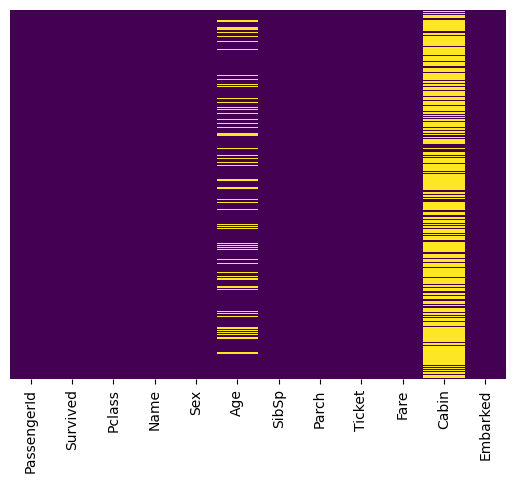

In [4]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We want to view the count of categorical data via histograms. Histogram over categorical data is called countplot.

<Axes: xlabel='Survived', ylabel='count'>

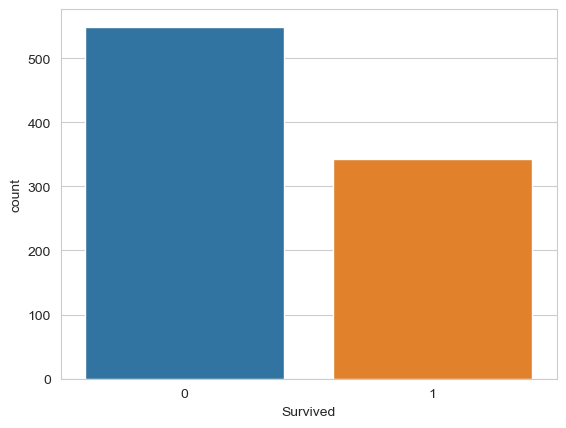

In [5]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = dataset)

<Axes: xlabel='Survived', ylabel='count'>

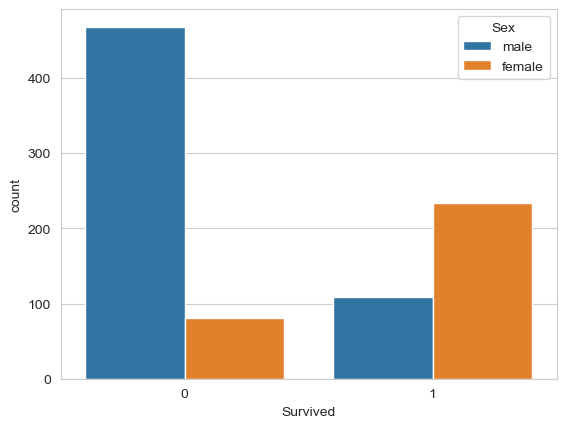

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data=dataset)

<Axes: xlabel='Survived', ylabel='count'>

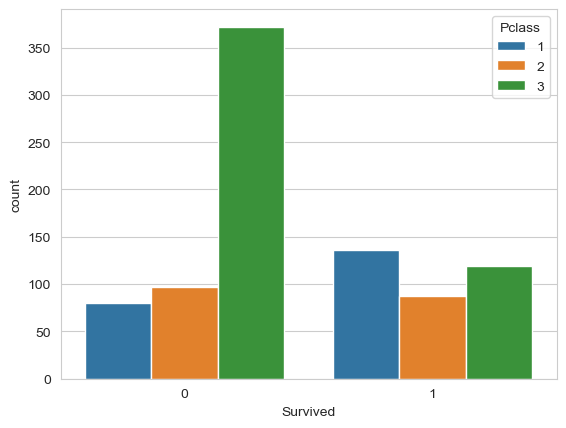

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = dataset)

/Users/varundhingra/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


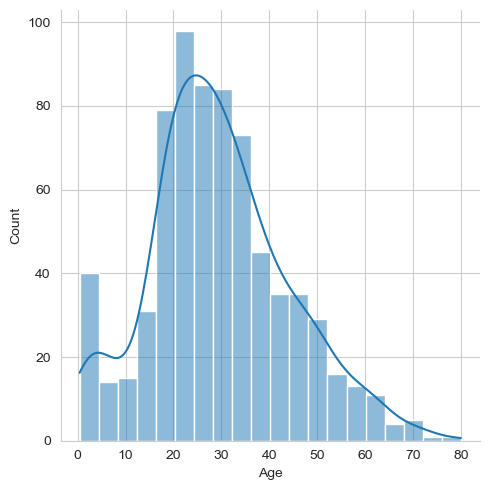

In [8]:
sns.displot(data = dataset, x='Age', kde = True)

/Users/varundhingra/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


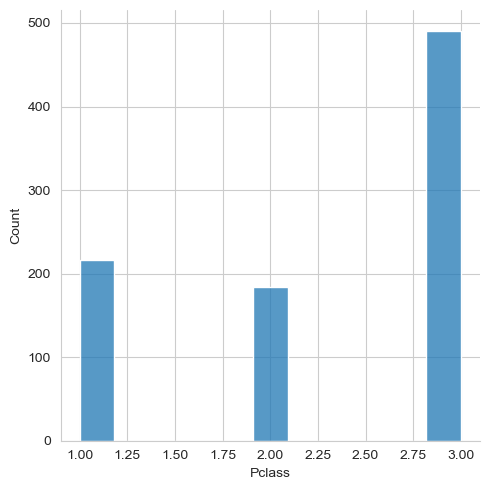

In [9]:
sns.displot(data = dataset, x='Pclass')

<Axes: xlabel='SibSp', ylabel='count'>

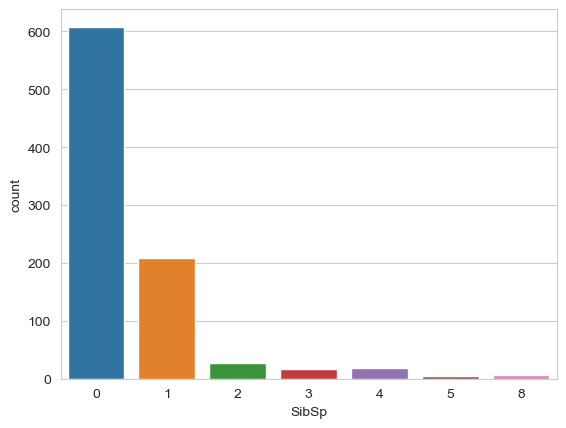

In [10]:
sns.countplot(x='SibSp', data = dataset)

<Axes: >

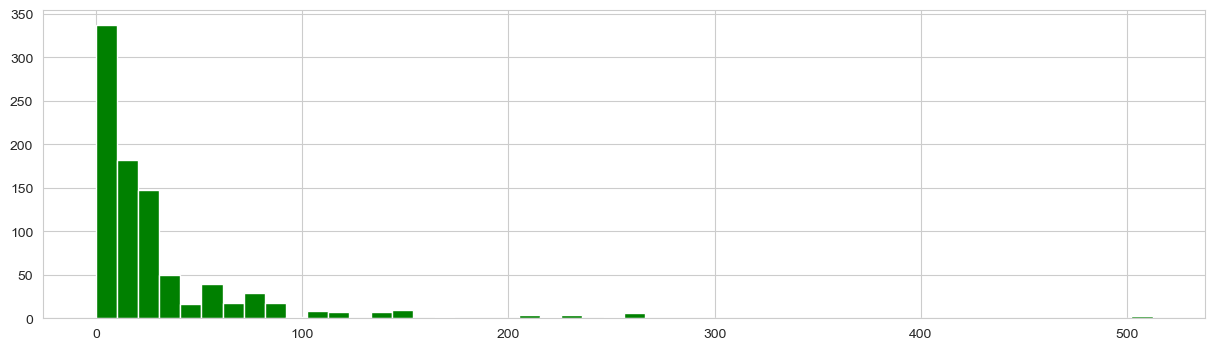

In [11]:
dataset['Fare'].hist(color = 'green', bins = 50, figsize = (15, 4))

# Data Cleaning

Age has misssing values. hence it needs to be imputed.

<Axes: xlabel='Pclass', ylabel='Age'>

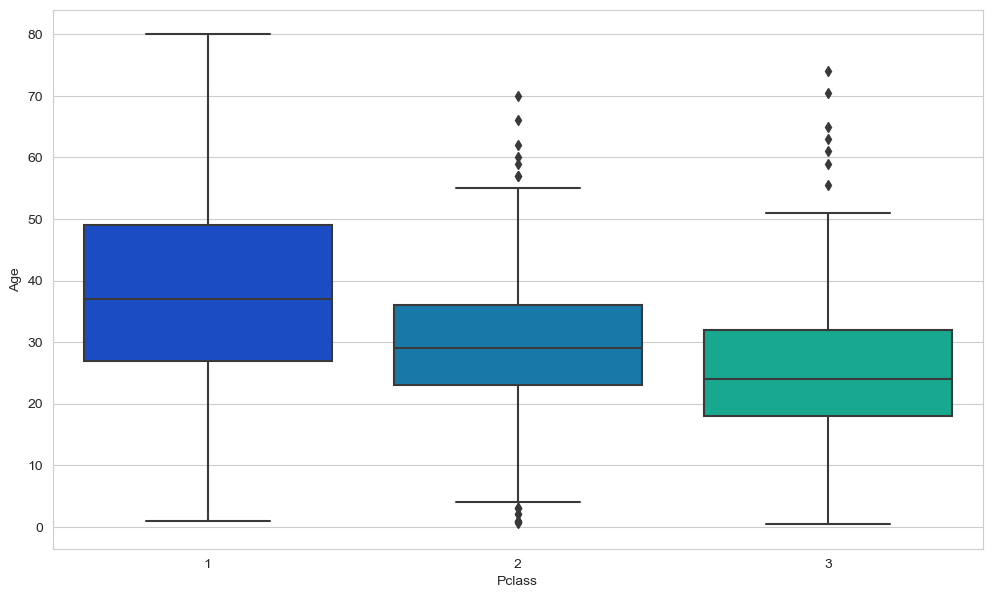

In [12]:
plt.figure(figsize = (12, 7))
sns.boxplot(x='Pclass', y='Age', data=dataset, palette='winter')

Each Passenger class has a different age group. Thus, we will impute the missing age values based on the Pclass means. We thus code the following imoutation method.

In [13]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 25
    else:
        return age

Apply the above function to the age

In [14]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age, axis=1)

<Axes: >

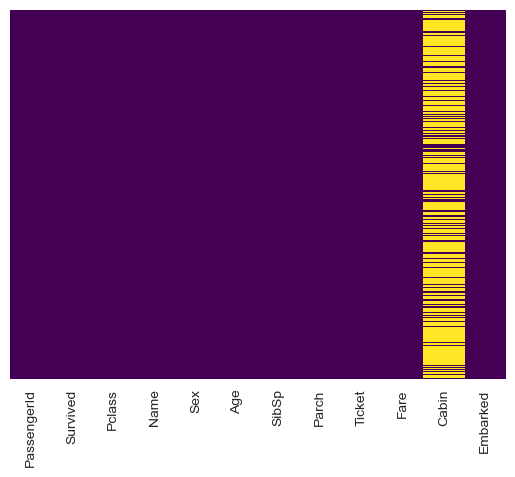

In [15]:
sns.heatmap(dataset.isnull(), yticklabels = False,cbar=False, cmap='viridis')

In [16]:
dataset.drop('Cabin', axis = 1, inplace = True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<Axes: >

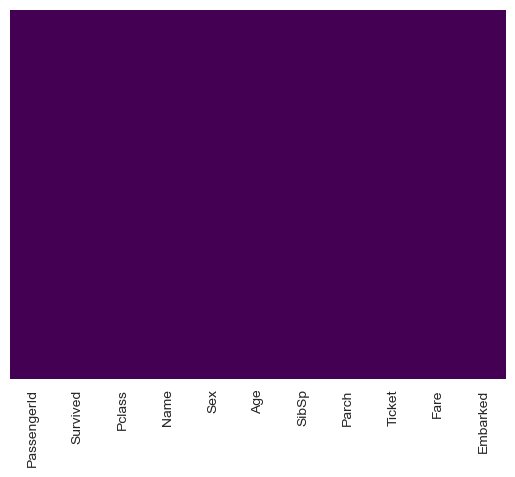

In [18]:
sns.heatmap(dataset.isnull(), yticklabels = False,cbar=False, cmap='viridis')

In [19]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
dataset['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
5                  330877
6                   17463
7                  349909
8                  347742
9                  237736
10                PP 9549
11                 113783
12              A/5. 2151
13                 347082
14                 350406
15                 248706
16                 382652
17                 244373
18                 345763
19                   2649
20                 239865
21                 248698
22                 330923
23                 113788
24                 349909
25                 347077
26                   2631
27                  19950
28                 330959
29                 349216
30               PC 17601
31               PC 17569
32                 335677
33             C.A. 24579
34               PC 17604
35                 113789
36                   2677
37             A./5. 2152
38          

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


There is 1 missing data in the Embarked column hence that row will be dropped.

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [23]:
dataset.drop('PassengerId', axis = 1, inplace = True)

In [24]:
dataset.drop('Ticket', axis = 1, inplace = True)

In [25]:
dataset.drop('Name', axis = 1, inplace = True)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Encode all categorical features (One Hot Encoding)

There are 2 Object type colummns in the dataset - Sex and Embarked. These will be One hot encoded.

In [27]:
pd.get_dummies(dataset['Sex'], drop_first=True).head()

,male
0,True
1,False
2,False
3,False
4,True


In [28]:
pd.get_dummies(dataset['Embarked'], drop_first = True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [29]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
embark = pd.get_dummies(dataset['Embarked'], drop_first = True)

In [30]:
dataset.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [31]:
dataset = pd.concat([dataset, sex, embark], axis = 1)

In [32]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Splitting the data into Training and Validation sets

In [33]:
x_train, x_validate, y_train, y_validate = train_test_split(dataset.drop('Survived', axis = 1), 
                                                            dataset['Survived'], test_size = 0.30)

# Logistic Regression model

In [34]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

/Users/varundhingra/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predictions = log_model.predict(x_validate)
confusion_matrix(y_validate, predictions)

array([[127,  33],
       [ 37,  71]])

In [36]:
accuracy_score(y_validate, predictions)

0.7388059701492538

Scikit learn uses a different optimizer than Gradient descent. It uses the BFGS optimizer.

While training the Logistic regression model, the BFGS optimizer is not converging meaning that we are getting just the local minima and not the global minima. To get the global minima, we reach convergence by increasing the limit of the total number of iterations.

In [37]:
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
predictions = log_model.predict(x_validate)

In [39]:
confusion_matrix(y_validate, predictions)

array([[127,  33],
       [ 37,  71]])

In [40]:
accuracy_score(y_validate, predictions)

0.7388059701492538

# Testing


In [41]:
test = pd.read_csv('test.csv')

#Shape of the datast with Rows and Columns
print(dataset.shape)
print(test.shape)

(891, 9)
(418, 11)


<Axes: >

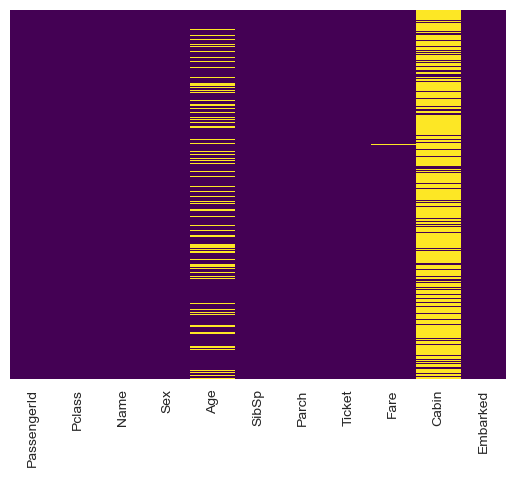

In [42]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Pclass', ylabel='Age'>

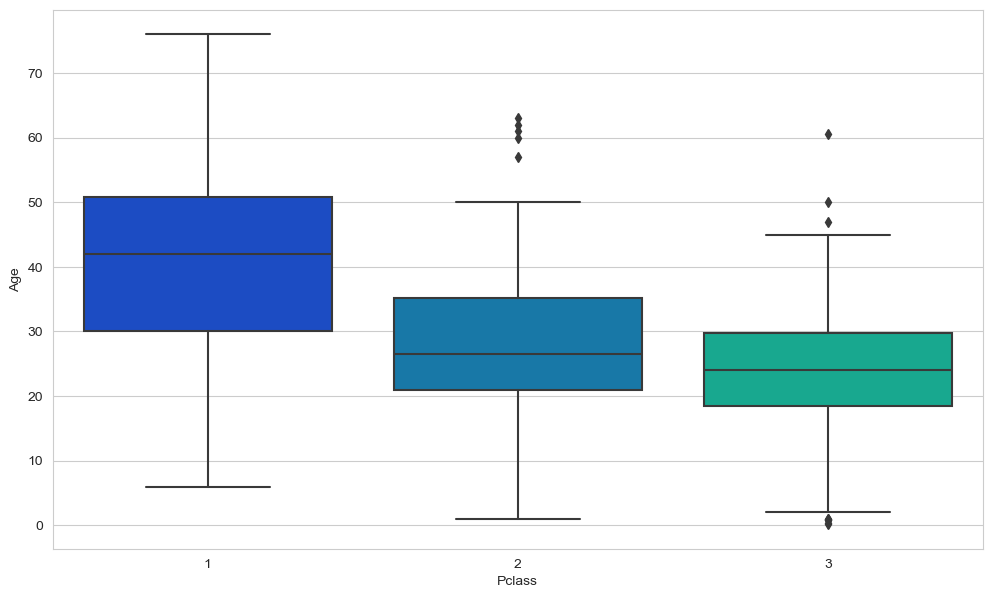

In [43]:
plt.figure(figsize = (12, 7))
sns.boxplot(x='Pclass', y='Age', data=test, palette='winter')

In [44]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 41
        elif pclass == 2:
            return 27
        else:
            return 25
    else:
        return age

In [45]:
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

<Axes: >

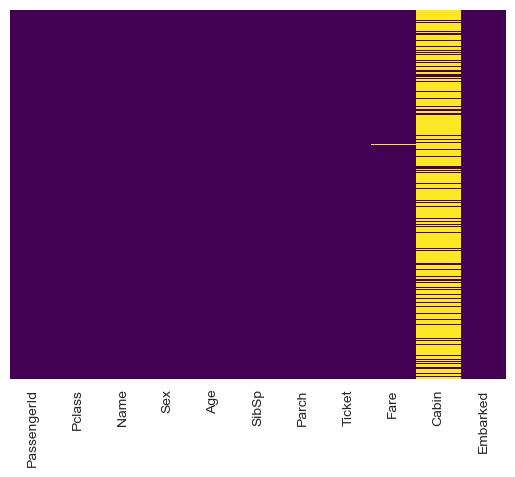

In [46]:
sns.heatmap(test.isnull(), yticklabels = False,cbar=False, cmap='viridis')

In [47]:
test.drop('Cabin', axis = 1, inplace = True)

<Axes: >

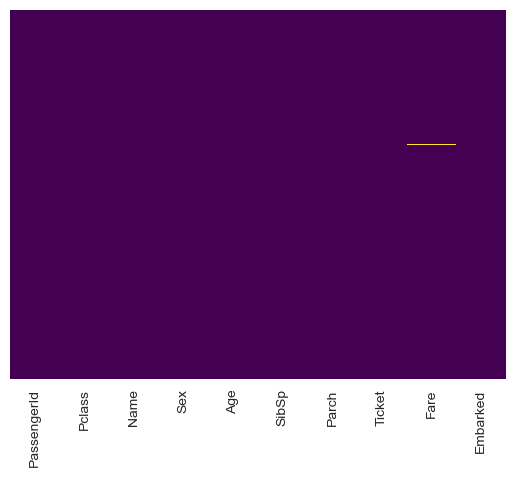

In [48]:
sns.heatmap(test.isnull(), yticklabels = False,cbar=False, cmap='viridis')

In [49]:
test.drop(['PassengerId', 'Ticket', 'Name'], axis = 1, inplace = True)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


There is an empty data for Fare column. I will analyze the other values

In [51]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50,0,0,7.8292,Q
1,3,female,47.00,1,0,7.0000,S
2,2,male,62.00,0,0,9.6875,Q
3,3,male,27.00,0,0,8.6625,S
4,3,female,22.00,1,1,12.2875,S
5,3,male,14.00,0,0,9.2250,S
6,3,female,30.00,0,0,7.6292,Q
7,2,male,26.00,1,1,29.0000,S
8,3,female,18.00,0,0,7.2292,C
9,3,male,21.00,2,0,24.1500,S


In [52]:
print(test.loc[(test['Pclass'] == 3)& (test['Sex'] == 'male') & (test['Age'] >= 50)& (test['Embarked'] == 'S')])

     Pclass   Sex   Age  SibSp  Parch  Fare Embarked
25        3  male  50.0      1      0  14.5        S
152       3  male  60.5      0      0   NaN        S


The missing record is an outlier.
Since the missing data is for a male who embarked from station S for third class, the only other record similar to the record has a fare of 14.5 Pounds. I will thus use that particular value.

In [53]:
test['Fare'] = test['Fare'].fillna(14.5)

<Axes: >

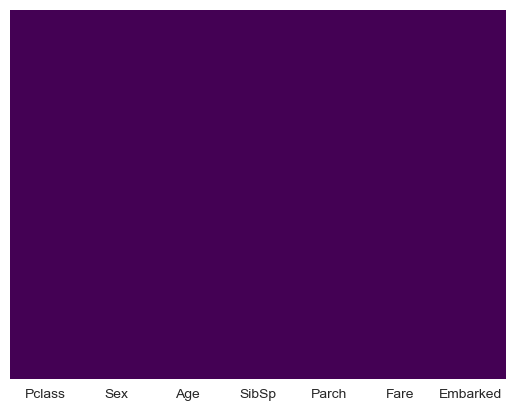

In [54]:
sns.heatmap(test.isnull(), yticklabels = False,cbar=False, cmap='viridis')

In [55]:
dataset.shape


(891, 9)

In [56]:
test.shape

(418, 7)

In [57]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [59]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first = True)

In [60]:
test.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
test = pd.concat([test, sex, embark], axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    bool   
 6   Q       418 non-null    bool   
 7   S       418 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 17.7 KB


In [61]:
test.head()


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [62]:
dataset.shape


(891, 9)

In [63]:
test.shape

(418, 8)

In [64]:
log_model.predict(test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,